<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/10thWeekTasks/Task_10_Neural_Network_D2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar

NIM : 1103210143

Judul Tugas : Lecture 10, model Neural Network D2L, dataset housepricedata.csv

Chatgpt link: https://chatgpt.com/share/4846bef6-81b7-4200-bb8f-0c7b9e03aa06

In [6]:
!pip install d2l==1.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: matplotlib-in

# Import Library

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Accessing and Reading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Tentukan path file di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Baca dataset menjadi DataFrame
data = pd.read_csv(file_path)

#Menampilkan informasi atau contoh data dari DataFrame
print(data.head())
data.info()

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Colum

# Preprocessing

In [4]:
# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [8]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Selection

In [9]:
# Define the model
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.hidden(x)

model = HousePriceModel()

In [10]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0495
Epoch [20/100], Loss: 0.0645
Epoch [30/100], Loss: 0.0522
Epoch [40/100], Loss: 0.0096
Epoch [50/100], Loss: 0.0181
Epoch [60/100], Loss: 0.0350
Epoch [70/100], Loss: 0.0197
Epoch [80/100], Loss: 0.0340
Epoch [90/100], Loss: 0.0108
Epoch [100/100], Loss: 0.0274


# Evaluation

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_pred.extend(outputs.numpy())
        y_true.extend(y_batch.numpy())

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    # Calculate R-squared
    r2 = r2_score(y_true, y_pred)
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)

    print(f'R-squared: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')

R-squared: 0.5995
Mean Absolute Error: 0.1812


# Visualization

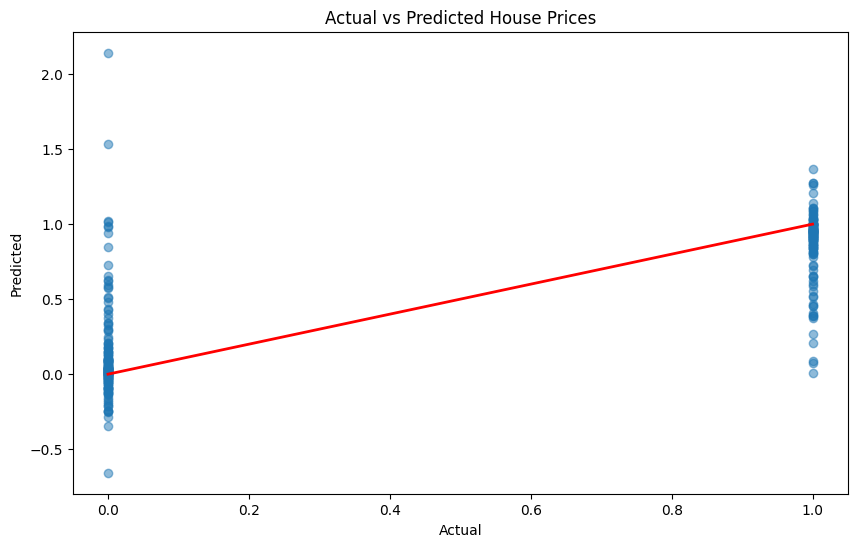

In [27]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

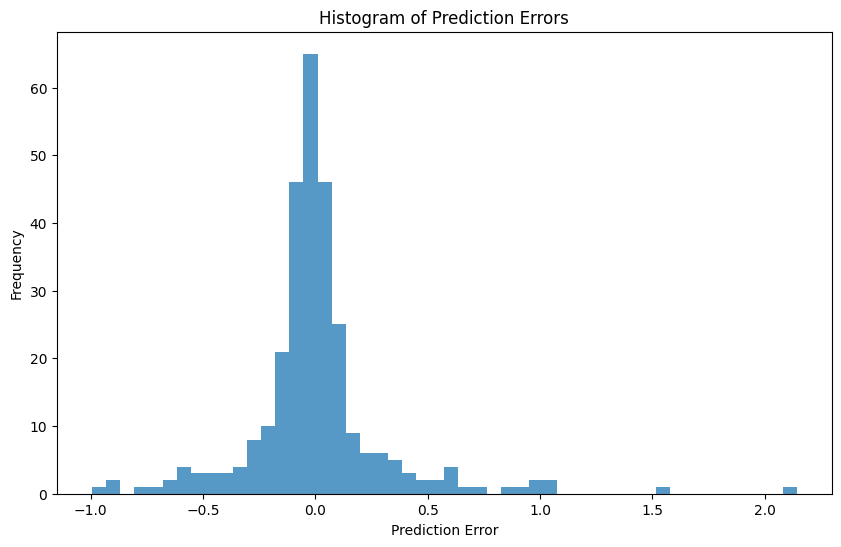

In [28]:
# 2. Histogram of errors
errors = y_pred - y_true
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.75)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

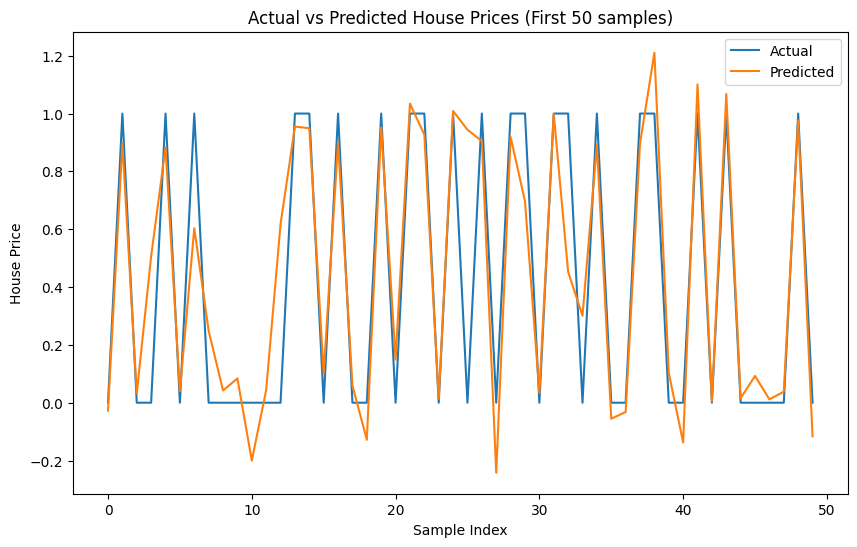

In [29]:
# 3. Line plot of a sample of predictions vs actual values
sample_size = 50
plt.figure(figsize=(10, 6))
plt.plot(y_true[:sample_size], label='Actual')
plt.plot(y_pred[:sample_size], label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices (First 50 samples)')
plt.legend()
plt.show()